# Download models

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

# Download detect_from_image.py
https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbkdEaWJ1NGo0c21oZGRnNm8zU2psRnBKY2RTd3xBQ3Jtc0tsTzhzU2dLUUY3dzhsMWEzNzFudDlIR1h1MXZlSWhHRHEtYnRoTmFhbmZIbkhuRHV1NURRXzdPYVItYlcydHZuRnJURFcwdXZYRk5rX3N1cGxscHhSV1JjVUN2cjZNSmdXdF9xN24tWWRzdEs4M2M3OA&q=https%3A%2F%2Fgithub.com%2FBenGreenfield825%2FTensorflow-Object-Detection-with-Tensorflow-2.0%2Fblob%2Fmaster%2Fdetection_scripts%2Fdetect_from_image.py&v=SgqY91_5PVU

# Use Labelmg to edit pictures and generate xml files
https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbDdSWTJnTHhwUC1RMkxzTjBCZExqR3lRRDJhd3xBQ3Jtc0tsMTFMME5TdFpfS2w5d1F3WkNGd0ROUVNkd1dKbVdqaHZrajJBdi1vRWRlODBLTFdIdDAycDV6cTFJbnRzbFZIZGVTUEQtbHFKd3pjR3FPT1VLM1hCaF9lWElQS1dTQXNYRm9pbGU5WGhLa2I4Vzd1QQ&q=https%3A%2F%2Fgithub.com%2Fheartexlabs%2FlabelImg%2Freleases&v=t_IAd7xdito

# Download  generate_tfrecord.py
https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqblpNc28ydG50UmltWHhFRnR2NXQwY0ZlWTVMUXxBQ3Jtc0tra3VRV09xUXh1Z1lROWI2b1ZVRHI2ZHFUZmxwN2lHLWtTTkc1bkV5NENlVC1aSldSQVJfcWg1d0plMWJlNS15TEMxS2Nvdkd1MGJMVUdMT3NoeDRFWHpSSDBFNzF0ZXNvdmpPVzZxQWQ2RHpMNlMtaw&q=https%3A%2F%2Fgithub.com%2Fnicknochnack%2FGenerateTFRecord%2Fblob%2Fmain%2Fgenerate_tfrecord.py&v=t_IAd7xdito

Change file name generate_tfrecordCSV.py

# Convert xml to csv - 1
Test.record and test_labels.csv will be generated

In [ ]:
!python generate_tfrecordCSV.py --labels_path=labelmap.pbtxt --xml_dir=images/test --output_path=test.record --csv_path=images/test_labels.csv

# Convert xml to csv - 2
will generate train.record and train_labels.csv

In [ ]:
!python generate_tfrecordCSV.py --labels_path=labelmap.pbtxt --xml_dir=images/train --output_path=train.record --csv_path=images/train_labels.csv

# Download the model to the main directory
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
efficientdet_d0_coco17_tpu-32
ssd_mobilenet_v2_320x320_coco17_tpu-8

# Edit pipeline.config
Edit pipeline.config of efficientdet_d0_coco17_tpu-32
Edit pipeline.config of ssd_mobilenet_v2_320x320_coco17_tpu-8


In [ ]:
#efficientdet_d0_coco17_tpu-32 pipeline.config  

num_classes: 2
    train_config:
        batch_size: 12
        fine_tune_checkpoint: "efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0"
        fine_tune_checkpoint_type: "detection"
    train_input_reader:
        label_map_path: "labelmap.pbtxt"
        input_path: "train.record"
    eval_input_reader:
        label_map_path: "labelmap.pbtxt"
        input_path: "test.record"

In [ ]:
ssd_mobilenet_v2_320x320_coco17_tpu-8 pipeline.config

num_classes: 2
    train_config:
        batch_size: 12
        fine_tune_checkpoint: "ssd_mobilenet_v2_320x320_coco17_tpu-8\checkpoint\ckpt-0"
        fine_tune_checkpoint_type: "detection"
    train_input_reader:
        label_map_path: "labelmap.pbtxt"
        input_path: "train.record"
    eval_input_reader:
        label_map_path: "labelmap.pbtxt"
        input_path: "test.record"

# Copy the pipeline.config of ssd_mobilenet_v2_320x320_coco17_tpu-8 to the main directory


# Copy model_main_tf2.py to the main directory


# Training Model

In [ ]:
!python model_main_tf2.py --pipeline_config_path=pipeline.config --model_dir=training --num_train_steps=2000 --sample_1_of_n_eval_examples=1

# Evaluate Model The following actions are executed in the virtual environment

# Evaluate-Execute model_main_tf2.py
Go to main directory  
Execute python model_main_tf2.py --pipeline_config_path=pipeline.config --model_dir=training --checkpoint_dir=training


# Evaluate-View training status
   Go to the home directory and execute  
   Execute tensorboard --logdir=training  
   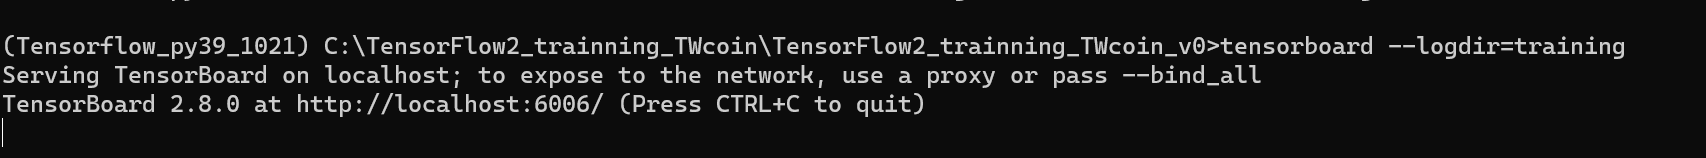
   Will produce http://localhost:6006
   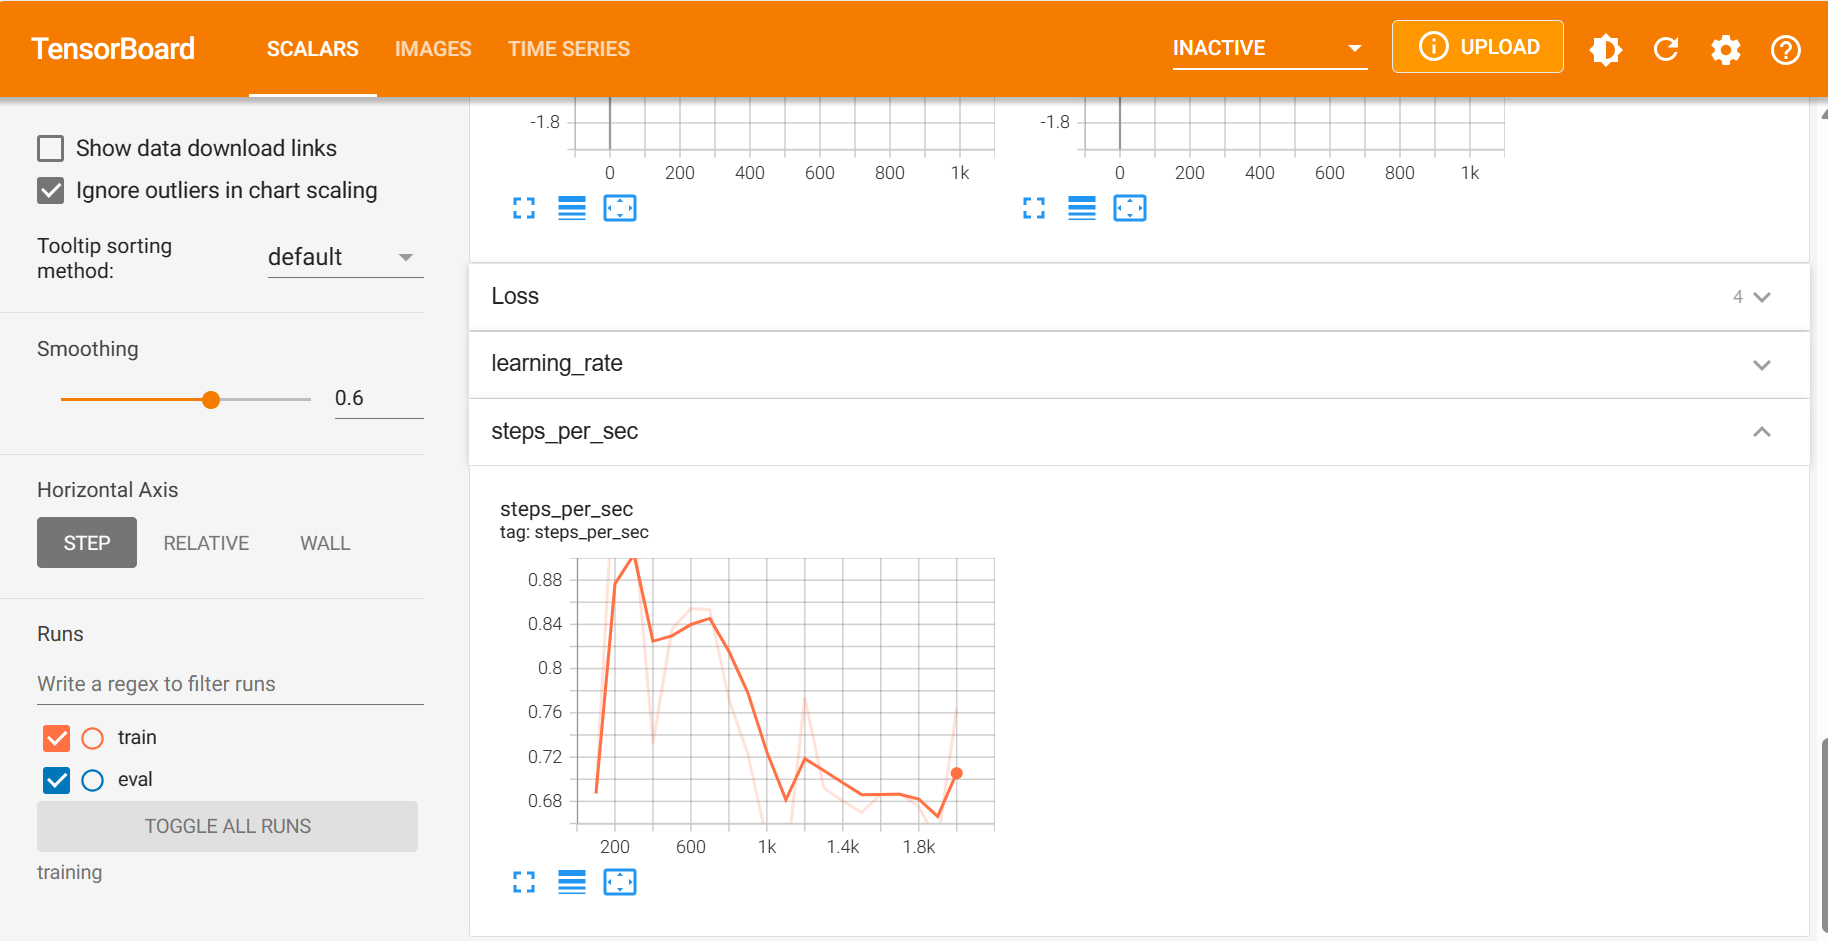

   You can enter tensroboard during training without waiting for training to complete or be interrupted.

# Export Model

# Export Model-copy export_main_v2.py to the main directory


# Export Model-Enter virtual environment


In [ ]:
!python exporter_main_v2.py --trained_checkpoint_dir=training --pipeline_config_path=pipeline.config --output_directory=inference_graph

# Export Model-generate inference_graph folder


# Use export model


# Use Export Model-copy detect_from_image.py to the home directory

# Use Export Model-Enter the virtual environment

# Use Export Model-Create folder outputs


# Use export Model-execute detect_from_image.py
The photos to be identified are placed in images\test


In [ ]:
# Run Model Bulider Test file, just to verify everything's working properly
! python detect_from_image.py -m inference_graph\saved_model -l labelmap.pbtxt -i images\test

# Use Export Model-recognize the completed image and place it in the outputs folder